In [1]:
import numpy as np
import pandas as pd

import pytraj as pt
import pyemma

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

from glob import glob

import free_energy_clustering as FEC

In [2]:
def set_style():
    plt.style.use(['seaborn-ticks', 'seaborn-notebook'])
    matplotlib.rc("font", family="Arial")

In [3]:
rf0=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot0.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7')

rf1=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot1.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7')

rf2=pt.load('../1-Trajectories/0-Parm_rst//closed6_dry_rot2.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7')

rf3=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot3.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7')

rf4=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot4.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7')

rf5=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot5.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('../1-Trajectories/0-Parm_rst/open10_dry.rst7',
               '../1-Trajectories/0-Parm_rst/open10_dry.parm7')

In [4]:
indir = '../1-Trajectories/2-NoEq_with_IPA'
topfile = '../1-Trajectories/0-Parm_rst/open10_dry.parm7'

traj_list = sorted(glob(indir+'/*.nc'))
traj_list

['../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_01.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_02.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_03.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_04.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_05.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_06.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_07.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_08.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_09.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_10.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_01.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_02.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_03.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_04.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_05.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_06.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_07.nc',
 '../1-Traj

In [5]:
traj = pt.iterload(traj_list, topfile, stride=5)
traj.save('traj_noeq_IPA_combined.nc', overwrite=True)

In [6]:
traj

pytraj.TrajectoryIterator, 143000 frames: 
Size: 8.975208 (GB)
<Topology: 2808 atoms, 192 residues, 6 mols, PBC with box type = truncoct>
           

In [7]:
rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")

rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)

rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")


In [8]:
Z=[]
for i in range(0,len(rmsd_open)):
    a=np.array([rmsd_closed[i],rmsd_open[i]])
    Z.append(a)
Z=np.array(Z)


In [9]:
Z

array([[1.94499767, 2.87750218],
       [1.94360605, 2.92935512],
       [2.01315341, 2.76742181],
       ...,
       [2.80045576, 1.92436864],
       [2.92895645, 1.91737879],
       [3.03188509, 1.76540451]])

In [10]:
fec = FEC.FreeEnergyClustering(Z, min_n_components=5, max_n_components=15, temperature=293.15,
                               x_lims=[[0.0,4.5],[0.0,4.5]],
                               n_iterations=5, n_grids=200, n_splits=1,stack_landscapes=False)

*----------------Gaussian mixture model free energy estimator----------------*
   n_splits = 1
   shuffle_data = False
   n_iterations = 5
   n_grids = 200
   covergence_tol = 0.0001
   stack_landscapes = False
   x_lims (axes limits) = [[0.0, 4.5], [0.0, 4.5]]
   temperature = 293.15
   min_n_components = 5
   max_n_components = 15
   n_components_step = 1
   Using weighted data: False
*----------------------------------------------------------------------------*


In [11]:
coords, FE_landscape, FE_points = fec.landscape()

Estimating density with GMM.
# Components = 5
# Components = 6
# Components = 7
# Components = 8
# Components = 9
# Components = 10
# Components = 11
# Components = 12
# Components = 13
# Components = 14
# Components = 15
Identifying final model with 11 components.
Evaluating density in landscape
Density grid shape: [200, 200]


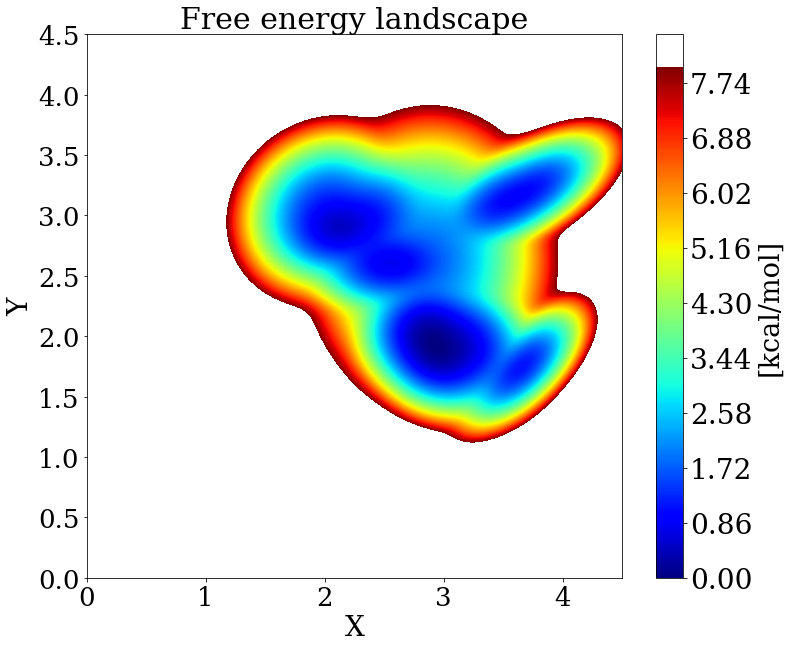

In [12]:
fec.visualize(savefig=False, show_data=False, n_contour_levels=1000,
              vmax=8, xlabel='X', ylabel='Y')

In [13]:
labels, cluster_centers = fec.cluster(coords, FE_points,Z, assign_transition_points=False)
print("Cluster center indices: "+str(cluster_centers))

# Computing state populations
state_populations = fec.population_states(n_sampled_points=10000)

Clustering free energy landscape...
Computing Hessians of density landscape.
Point: 40000/40000
Constructing connected components.
# Graph connections: 23874.0
Clustering data points.
Cluster labels: [0. 1. 2. 3. 4. 5.]
Done clustering.
Cluster center indices: [121336 123900  31573  14538  75432]
Sampling points from density.
Assigning cluster labels based on precomputed density model clustering.
Computing state populations.


/home/el14718/Modelling/10-ALKEIG/10-Analysis_3/4-InfleCS_clustering/free_energy_clustering/GMM_free_energy.py:642: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  linewidth=4, facecolor='',edgecolor='w', label='Cluster center')


([<matplotlib.axis.XTick at 0x7f3e2c24b750>,
 <a list of 5 Text major ticklabel objects>)

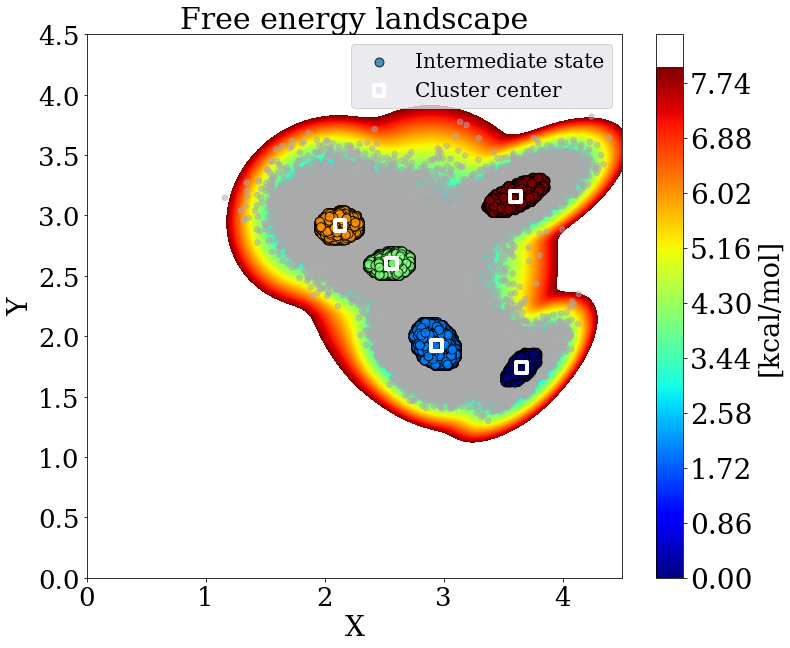

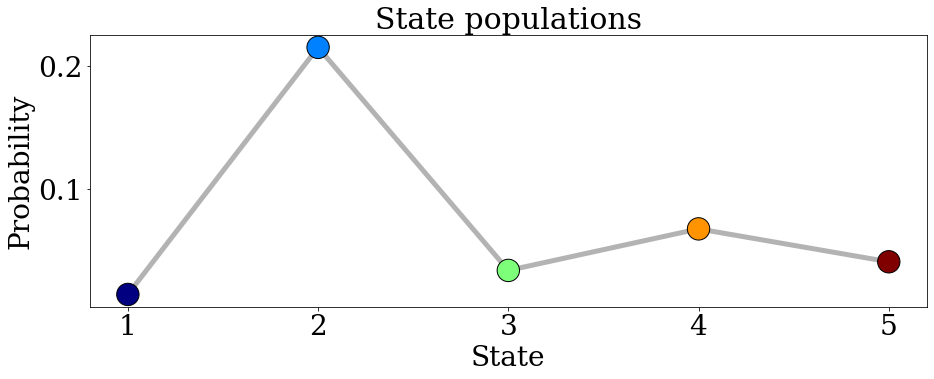

In [14]:
# Visualize free energy landscape with cluster labels
fec.pathways_ = None
fec.visualize(savefig=False, vmax=8, show_data=True, xlabel='X', ylabel='Y', 
              n_contour_levels=1000)

# Plotting the state populations
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5]);
plt.plot(np.arange(1,state_populations.shape[0]),state_populations[1::]/state_populations.sum(),linewidth=5,color=[0.7,0.7,0.7],zorder=-1)
plt.scatter(np.arange(1,state_populations.shape[0]),state_populations[1::]/state_populations.sum(),s=500,c=np.arange(1,state_populations.shape[0]),cmap='jet',edgecolor='k')
plt.title('State populations',fontsize=30)
plt.xlabel('State',fontsize=28)
plt.ylabel('Probability',fontsize=28)
plt.xticks(np.arange(1,state_populations.shape[0]))

In [16]:
for i in range(0,5):
    traj[cluster_centers[i]:cluster_centers[i]+1].save('./Cluster_centres/Cluster_{}_IPA.pdb'.format(i+1)
                                                       , overwrite=True)

Iteration: 300/300


/home/el14718/Modelling/10-ALKEIG/9-Analysis_all_2/free_energy_clustering/GMM_free_energy.py:642: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  linewidth=4, facecolor='',edgecolor='w', label='Cluster center')


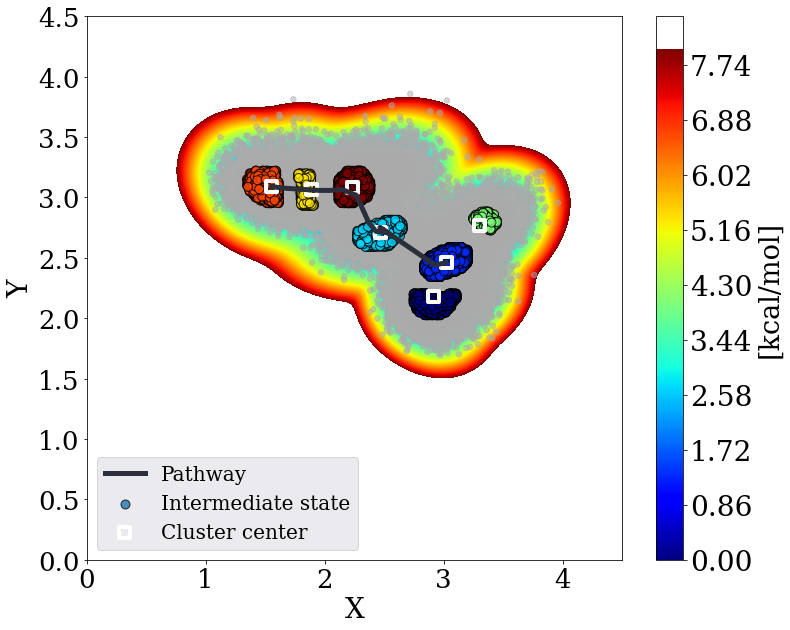

In [55]:
fec.pathways([cluster_centers[0]],[cluster_centers[5]],max_iter=300,
             convergence_tol=1e-4,step_size=2e-2,n_points=20)

fec.visualize(savefig=False, vmax=8, n_contour_levels=1000, show_data=True, xlabel='X', ylabel='Y', filename='pathways', title='')

In [1]:
plt.plot(rmsd_closed_all, rmsd_open_all, marker=".", ms=0.005, ls='None') 

NameError: name 'plt' is not defined

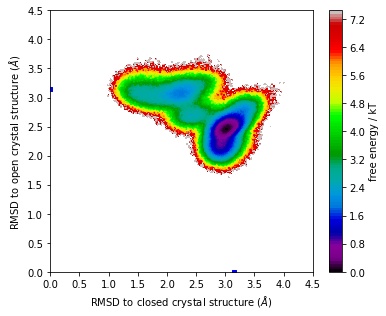

In [12]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_all, rmsd_open_all, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_cmap.png', dpi=800)

In [13]:
indir = './traj_dry_noeq_with_ipa'
topfile = './parm_rst/open10_dry.parm7'

traj_list2 = sorted(glob(indir+'/*.nc'))
traj_list2

['./traj_dry_noeq_with_ipa/closed_ipa_dry_1.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_10.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_2.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_3.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_4.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_5.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_6.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_7.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_8.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_9.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_1.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_10.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_2.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_3.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_4.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_5.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_6.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_7.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_8.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_9.nc']

In [14]:
results_open_ipa=[]
results_closed_ipa=[]
for t in traj_list2:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_ipa=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_ipa.append(rmsd_closed_ipa)
    
    rmsd_open_ipa=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_ipa.append(rmsd_open_ipa)

In [15]:
rmsd_open_ipa_all=np.concatenate(results_open_ipa, axis=0)
rmsd_closed_ipa_all=np.concatenate(results_closed_ipa, axis=0)

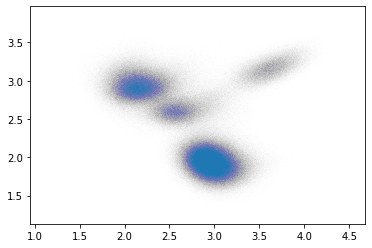

In [59]:
plt.plot(rmsd_closed_ipa_all, rmsd_open_ipa_all, marker=".", ms=0.005, ls='None') 

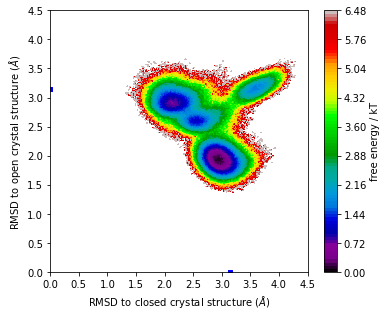

In [60]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa_all, rmsd_open_ipa_all, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_IPA_cmap.png', dpi=800)

In [18]:
indir = './traj_dry_noeq_without_ipa'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list3 = sorted(glob(indir+'/open*.nc'))
traj_list3

['./traj_dry_noeq_without_ipa/open_dry_1.nc',
 './traj_dry_noeq_without_ipa/open_dry_10.nc',
 './traj_dry_noeq_without_ipa/open_dry_2.nc',
 './traj_dry_noeq_without_ipa/open_dry_3.nc',
 './traj_dry_noeq_without_ipa/open_dry_4.nc',
 './traj_dry_noeq_without_ipa/open_dry_5.nc',
 './traj_dry_noeq_without_ipa/open_dry_6.nc',
 './traj_dry_noeq_without_ipa/open_dry_7.nc',
 './traj_dry_noeq_without_ipa/open_dry_8.nc',
 './traj_dry_noeq_without_ipa/open_dry_9.nc']

In [19]:
results_open_openonly=[]
results_closed_openonly=[]
for t in traj_list3:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_openonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_openonly.append(rmsd_closed_openonly)
    
    rmsd_open_openonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_openonly.append(rmsd_open_openonly)

In [20]:
rmsd_open_openonly=np.concatenate(results_open_openonly, axis=0)
rmsd_closed_openonly=np.concatenate(results_closed_openonly, axis=0)

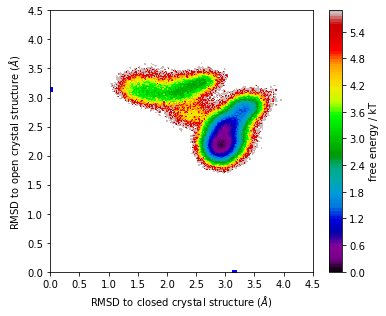

In [21]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_openonly, rmsd_open_openonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_openonly_cmap.png', dpi=800)

In [22]:
indir = './traj_dry_noeq_without_ipa'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list4 = sorted(glob(indir+'/closed*.nc'))
traj_list4

['./traj_dry_noeq_without_ipa/closed_dry_1.nc',
 './traj_dry_noeq_without_ipa/closed_dry_10.nc',
 './traj_dry_noeq_without_ipa/closed_dry_2.nc',
 './traj_dry_noeq_without_ipa/closed_dry_3.nc',
 './traj_dry_noeq_without_ipa/closed_dry_4.nc',
 './traj_dry_noeq_without_ipa/closed_dry_5.nc',
 './traj_dry_noeq_without_ipa/closed_dry_6.nc',
 './traj_dry_noeq_without_ipa/closed_dry_7.nc',
 './traj_dry_noeq_without_ipa/closed_dry_8.nc',
 './traj_dry_noeq_without_ipa/closed_dry_9.nc']

In [23]:
results_open_closedonly=[]
results_closed_closedonly=[]
for t in traj_list4:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_closedonly.append(rmsd_closed_closedonly)
    
    rmsd_open_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_closedonly.append(rmsd_open_closedonly)

In [24]:
rmsd_open_closedonly=np.concatenate(results_open_closedonly, axis=0)
rmsd_closed_closedonly=np.concatenate(results_closed_closedonly, axis=0)

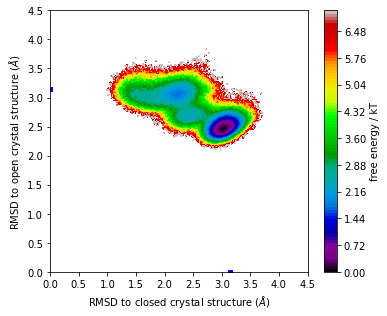

In [25]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedonly_cmap.png', dpi=800)

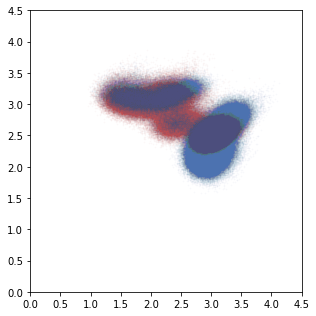

In [26]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02) 
ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=1, ls='None', c="#4C72B0", alpha=0.02) 

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/rmsd_fromclosed_fromopen.png', dpi=400)

In [27]:
len(rmsd_closed_closedonly)

497571

In [28]:
len(rmsd_open_closedonly)

497571

In [29]:
len(rmsd_open_openonly)

496163

In [30]:
len(rmsd_closed_openonly)

496163

In [31]:
indir = './traj_dry_noeq_with_ipa'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list5 = sorted(glob(indir+'/open*.nc'))
traj_list5

['./traj_dry_noeq_with_ipa/open_ipa_dry_1.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_10.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_2.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_3.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_4.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_5.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_6.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_7.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_8.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_9.nc']

In [32]:
results_open_ipa_openonly=[]
results_closed_ipa_openonly=[]
for t in traj_list5:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_ipa_openonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_ipa_openonly.append(rmsd_closed_ipa_openonly)
    
    rmsd_open_ipa_openonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_ipa_openonly.append(rmsd_open_ipa_openonly)

In [33]:
rmsd_open_ipa_openonly=np.concatenate(results_open_ipa_openonly, axis=0)
rmsd_closed_ipa_openonly=np.concatenate(results_closed_ipa_openonly, axis=0)

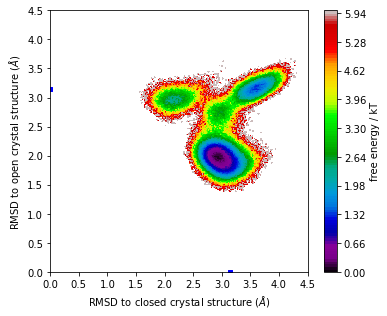

In [34]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa_openonly, rmsd_open_ipa_openonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_openonly_ipa_cmap.png', dpi=800)

In [35]:
indir = './traj_dry_noeq_with_ipa'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list6 = sorted(glob(indir+'/closed*.nc'))
traj_list6

['./traj_dry_noeq_with_ipa/closed_ipa_dry_1.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_10.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_2.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_3.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_4.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_5.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_6.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_7.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_8.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_9.nc']

In [36]:
results_open_ipa_closedonly=[]
results_closed_ipa_closedonly=[]
for t in traj_list6:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_ipa_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_ipa_closedonly.append(rmsd_closed_ipa_closedonly)
    
    rmsd_open_ipa_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_ipa_closedonly.append(rmsd_open_ipa_closedonly)

In [37]:
rmsd_open_ipa_closedonly=np.concatenate(results_open_ipa_closedonly, axis=0)
rmsd_closed_ipa_closedonly=np.concatenate(results_closed_ipa_closedonly, axis=0)

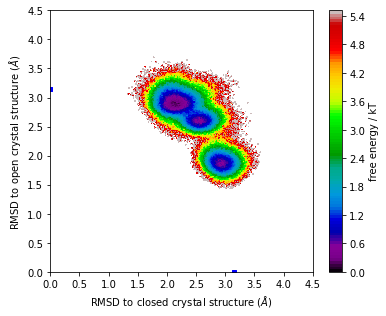

In [38]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa_closedonly, rmsd_open_ipa_closedonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedonly_ipa_cmap.png', dpi=800)

In [39]:
len(rmsd_closed_ipa_closedonly)

500000

In [40]:
len(rmsd_open_ipa_closedonly)

500000

In [41]:
len(rmsd_closed_ipa_openonly)

500000

In [42]:
for i in range(0,len(results_open_ipa_openonly)):
    print(len(results_open_ipa_openonly[i]))

50000
50000
50000
50000
50000
50000
50000
50000
50000
50000


In [43]:
for i in range(0,len(results_open_ipa_closedonly)):
    print(len(results_open_ipa_closedonly[i]))

50000
50000
50000
50000
50000
50000
50000
50000
50000
50000


In [44]:
indir = './rep_struct_1'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list7 = sorted(glob(indir+'/*.pdb'))
traj_list7

['./rep_struct_1/0.pdb',
 './rep_struct_1/1.pdb',
 './rep_struct_1/2.pdb',
 './rep_struct_1/3.pdb',
 './rep_struct_1/4.pdb',
 './rep_struct_1/5.pdb']

In [45]:
results_open_rep_struct=[]
results_closed_rep_struct=[]
for t in traj_list7:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_rep_struct=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_rep_struct.append(rmsd_closed_rep_struct)
    
    rmsd_open_rep_struct=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_rep_struct.append(rmsd_open_rep_struct)

In [46]:
rmsd_open_rep_struct=np.concatenate(results_open_rep_struct, axis=0)
rmsd_closed_rep_struct=np.concatenate(results_closed_rep_struct, axis=0)

In [47]:
def plot_labels(ax=None):
    #if ax is None:
        #ax = gca()
    for i in range(0,len(rmsd_open_rep_struct_ipa)):
        plt.text(rmsd_closed_rep_struct_ipa[i]+0.04, rmsd_open_rep_struct_ipa[i]+0.04, 
                 i, fontsize=10, color='white')

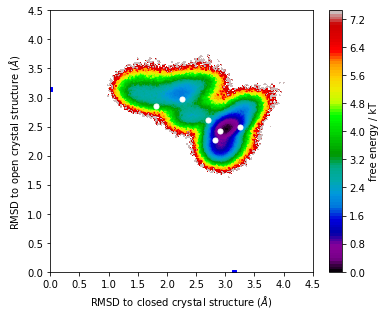

In [48]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_all, rmsd_open_all, nbins=200,ax=ax, cbar=True)

ax.plot(rmsd_closed_rep_struct, rmsd_open_rep_struct, linewidth=0, marker='o', markersize=5, color='white')

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
# fig.savefig('./plots/FES_rmsd_cmap.png', dpi=800)

In [49]:
indir = './rep_struct_ipa_1'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list8 = sorted(glob(indir+'/*.pdb'))
traj_list8

['./rep_struct_ipa_1/0.pdb',
 './rep_struct_ipa_1/1.pdb',
 './rep_struct_ipa_1/2.pdb',
 './rep_struct_ipa_1/3.pdb']

In [50]:
results_open_rep_struct_ipa=[]
results_closed_rep_struct_ipa=[]
for t in traj_list8:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_rep_struct_ipa=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_rep_struct_ipa.append(rmsd_closed_rep_struct_ipa)
    
    rmsd_open_rep_struct_ipa=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_rep_struct_ipa.append(rmsd_open_rep_struct_ipa)

In [51]:
rmsd_open_rep_struct_ipa=np.concatenate(results_open_rep_struct_ipa, axis=0)
rmsd_closed_rep_struct_ipa=np.concatenate(results_closed_rep_struct_ipa, axis=0)

In [52]:
rmsd_open_rep_struct_ipa

array([2.1590297 , 1.8054539 , 2.69445467, 2.66681716])

In [53]:
rmsd_closed_rep_struct_ipa

array([2.4567451 , 2.90197249, 3.38740526, 2.10944768])

In [54]:
def plot_labels(ax=None):
    #if ax is None:
        #ax = gca()
    for i in range(0,len(rmsd_open_rep_struct_ipa)):
        plt.text(rmsd_closed_rep_struct_ipa[i]+0.04, rmsd_open_rep_struct_ipa[i]+0.04, 
                 i, fontsize=10, color='white')

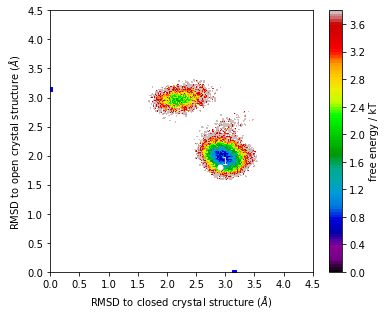

In [55]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa, rmsd_open_ipa, nbins=200,ax=ax, cbar=True)

ax.plot(rmsd_closed_rep_struct_ipa, rmsd_open_rep_struct_ipa, linewidth=0, marker='o', markersize=5, color='white')

plot_labels()

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()

In [56]:
Y_ipa=[]
for i in range(0,len(results_open_ipa)):  
    Z_ipa=[]
    for j in range(0,len(results_open_ipa[i])):
        a_ipa=np.array([results_closed_ipa[i][j],results_open_ipa[i][j]])
        Z_ipa.append(a_ipa)
    Z_ipa=np.array(Z_ipa)
    Y_ipa.append(Z_ipa)

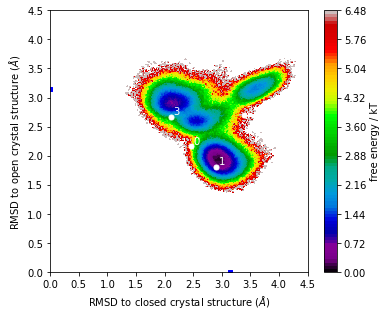

In [57]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(np.vstack(Y_ipa)[:, 0], np.vstack(Y_ipa)[:, 1], nbins=200,ax=ax, cbar=True)

ax.plot(rmsd_closed_rep_struct_ipa, rmsd_open_rep_struct_ipa, linewidth=0, marker='o', markersize=5, color='white')

plot_labels()

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()

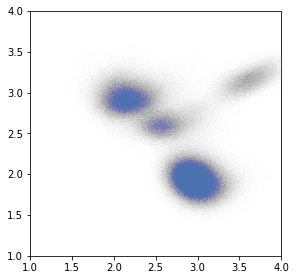

In [74]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

#ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=5, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
ax.plot(rmsd_closed_ipa_all, rmsd_open_ipa_all, marker="o", ms=0.05, ls='None', c="#4C72B0", alpha=0.02)


ax.set_xlim(1,4)
ax.set_ylim(1, 4)


fig.savefig('./plots/rmsd_w_IPA.png', dpi=400)

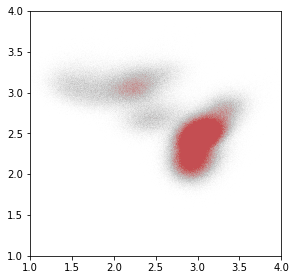

In [69]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

#ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=5, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
ax.plot(rmsd_closed_all, rmsd_open_all, marker="o", ms=0.05, ls='None', c="#C44E52", alpha=0.02)

# ax.plot(rmsd_closed_ipa_all, rmsd_open_ipa_all, marker="o", ms=0.05, ls='None', c="#4C72B0", alpha=0.02) 

ax.set_xlim(1,4)
ax.set_ylim(1, 4)

# ax.set_xticks(np.arange(0, 5, 0.5))
# ax.set_yticks(np.arange(0, 5, 0.5))

# fig.tight_layout()
fig.savefig('./plots/rmsd_wo_IPA.png', dpi=400)

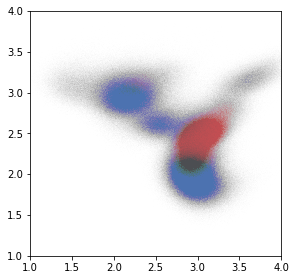

In [73]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

#ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=5, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
ax.plot(rmsd_closed_all, rmsd_open_all, marker="o", ms=0.05, ls='None', c="#C44E52", alpha=0.02)

ax.plot(rmsd_closed_ipa_all, rmsd_open_ipa_all, marker="o", ms=0.05, ls='None', c="#4C72B0", alpha=0.02) 

ax.set_xlim(1,4)
ax.set_ylim(1, 4)

# ax.set_xticks(np.arange(0, 5, 0.5))
# ax.set_yticks(np.arange(0, 5, 0.5))

# fig.tight_layout()
fig.savefig('./plots/rmsd_w_wo_IPA.png', dpi=400)

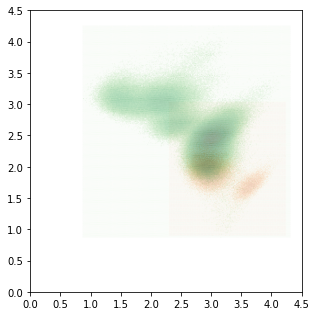

In [147]:
fig,ax=plt.subplots(figsize=(4.5,4.5))


ax.hexbin(rmsd_closed_ipa, rmsd_open_ipa, cmap="Oranges", alpha=0.5, bins='log',
          gridsize=200, edgecolors='none', linewidths=0.0) 
ax.hexbin(rmsd_closed, rmsd_open,cmap="Greens", alpha=0.5, bins='log',
          gridsize=200, edgecolors='none', linewidths=0.0) 



ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()

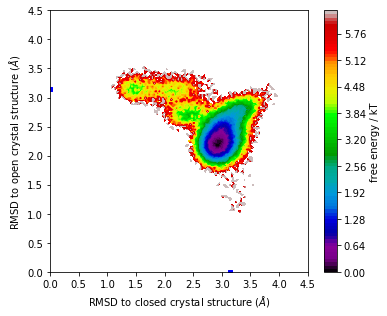

In [15]:
indir = './traj_dry_open_closed_adapt_all'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list3 = sorted(glob(indir+'/open*.nc'))

results_open_openonly=[]
results_closed_openonly=[]
for t in traj_list3:
    traj=pt.load(t, topfile, stride=2)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_openonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_openonly.append(rmsd_closed_openonly)
    
    rmsd_open_openonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_openonly.append(rmsd_open_openonly)

rmsd_open_openonly=np.concatenate(results_open_openonly, axis=0)
rmsd_closed_openonly=np.concatenate(results_closed_openonly, axis=0)

fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_openonly, rmsd_open_openonly, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_openonly_dt2_cmap.png', dpi=800)

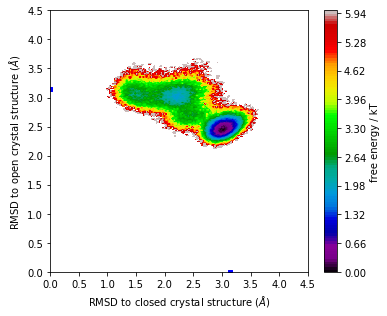

In [16]:
indir = './traj_dry_open_closed_adapt_all'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list4 = sorted(glob(indir+'/closed*.nc'))

results_open_closedonly=[]
results_closed_closedonly=[]
for t in traj_list4:
    traj=pt.load(t, topfile, stride=2)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_closedonly.append(rmsd_closed_closedonly)
    
    rmsd_open_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_closedonly.append(rmsd_open_closedonly)

rmsd_open_closedonly=np.concatenate(results_open_closedonly, axis=0)
rmsd_closed_closedonly=np.concatenate(results_closed_closedonly, axis=0)

fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedonly_dt2_cmap.png', dpi=800)

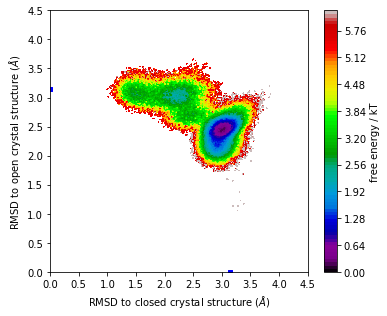

In [17]:
traj_list=traj_list4+traj_list3
for t in traj_list:
    traj=pt.load(t, topfile, stride=2)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_closedonly.append(rmsd_closed_closedonly)
    
    rmsd_open_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_closedonly.append(rmsd_open_closedonly)

rmsd_open_closedonly=np.concatenate(results_open_closedonly, axis=0)
rmsd_closed_closedonly=np.concatenate(results_closed_closedonly, axis=0)

fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedopenonly_dt2_cmap.png', dpi=800)

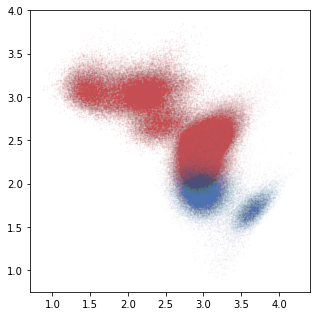

In [18]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
#ax.plot(rmsd_closed, rmsd_open, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02)

ax.plot(rmsd_closed_ipa, rmsd_open_ipa, marker="o", ms=1, ls='None', c="#4C72B0", alpha=0.02) 

#ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

#ax.set_xticks(np.arange(0, 5, 0.5))
#ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()